<a href="https://colab.research.google.com/github/michael-karemi/my-ishh/blob/main/mike's_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df1 = pd.read_csv("Continent_Consumption_TWH.csv")
df2 = pd.read_csv("Country_Consumption_TWH.csv")
df3 = pd.read_csv("nonRenewablesTotalPowerGeneration.csv")
df4 = pd.read_csv("renewablePowerGeneration97-17.csv")
df5 = pd.read_csv("renewablesTotalPowerGeneration.csv")
df6 = pd.read_csv("top20CountriesPowerGeneration.csv")

## data analysis of top 20 countries that have adopted renewable energy(data wrangling and data cleaning)

In [31]:
#changing column names
df6.columns = ['countries', 'hydro', 'biofuel', 'solar', 'geothermal', 'Summary']
df6

,countries,hydro,biofuel,solar,geothermal,Summary
0,China,1189.84,295.0200,79.43,0.1250,1819.9400
1,USA,315.62,277.9100,58.95,18.9600,758.6190
2,Brazil,370.90,42.3700,52.25,0.0000,466.3500
3,Canada,383.48,29.6500,7.12,0.0000,424.0900
4,India,141.80,51.0600,43.76,0.0000,262.6500
5,Germany,24.17,111.5900,45.10,0.1600,227.1800
6,Russia,187.13,0.1400,0.08,0.4300,188.3300
7,Japan,90.67,7.6300,19.01,2.4400,187.3490
8,France,70.13,28.5000,5.87,0.1300,114.8200
9,Italy,50.92,17.4900,16.85,6.0800,113.9900


In [24]:
df6.describe()

,hydro,biofuel,solar,geothermal,Summary
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,151.849500,51.149530,19.828000,2.667255,254.826935
std,273.122956,85.071233,23.726242,5.127413,413.203988
min,7.280000,0.000600,0.020000,0.000000,12.400000
25%,15.777500,2.277500,2.442500,0.000000,43.875150
50%,43.830000,18.685000,6.970000,0.062550,112.030000
75%,153.132500,50.872500,35.000000,3.170000,236.047500
max,1189.840000,295.020000,79.430000,18.960000,1819.940000


In [8]:
#check for null values in the dataset
df6.isna().sum()

countries     0
hydro         0
biofuel       0
solar         0
geothermal    0
Summary       0
dtype: int64

In [10]:
#checking for duplicated values in the dataset
df6.duplicated().sum()

0

## **analyzing the top 20 countries to identify the ones with low adoption of renewables**(Exploratory data Analysis)

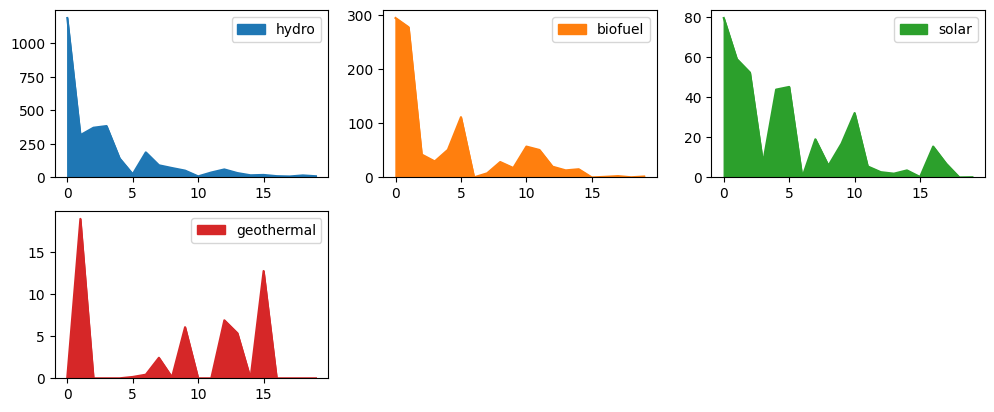

In [45]:
#distribution graph of how the top 20 countries have adopted renewable sources.
renewables = df6[['hydro', 'biofuel', 'solar', 'geothermal']]
renewables.plot(kind="area", subplots=True, layout=(4,3), sharex=False, figsize=(12, 10))
plt.show()

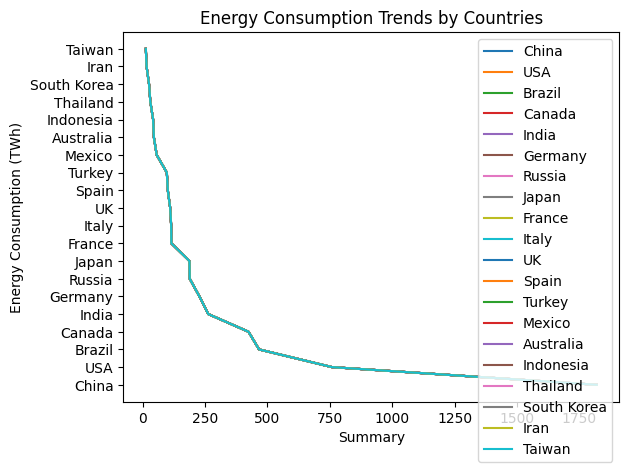

In [43]:
#comparing all 20 countries first
plt.plot(figsize=(10, 8))
plt.plot(df6.Summary, df6.countries, label='China'),
plt.plot(df6.Summary, df6.countries, label = 'USA'),
plt.plot(df6.Summary, df6.countries, label = 'Brazil'),
plt.plot(df6.Summary, df6.countries, label = 'Canada'),
plt.plot(df6.Summary, df6.countries, label = 'India'),
plt.plot(df6.Summary, df6.countries, label = 'Germany'),
plt.plot(df6.Summary, df6.countries, label = 'Russia'),
plt.plot(df6.Summary, df6.countries, label = 'Japan'),
plt.plot(df6.Summary, df6.countries, label = 'France'),
plt.plot(df6.Summary, df6.countries, label = 'Italy'),
plt.plot(df6.Summary, df6.countries, label = 'UK'),
plt.plot(df6.Summary, df6.countries, label = 'Spain'),
plt.plot(df6.Summary, df6.countries, label = 'Turkey'),
plt.plot(df6.Summary, df6.countries, label = 'Mexico'),
plt.plot(df6.Summary, df6.countries, label = 'Australia'),
plt.plot(df6.Summary, df6.countries, label = 'Indonesia'),
plt.plot(df6.Summary, df6.countries, label = 'Thailand'),
plt.plot(df6.Summary, df6.countries, label = 'South Korea'),
plt.plot(df6.Summary, df6.countries, label = 'Iran'),
plt.plot(df6.Summary, df6.countries, label = 'Taiwan'),


plt.title('Energy Consumption Trends by Countries')
plt.xlabel('Summary')
plt.ylabel('Energy Consumption (TWh)')
plt.legend()
plt.show()


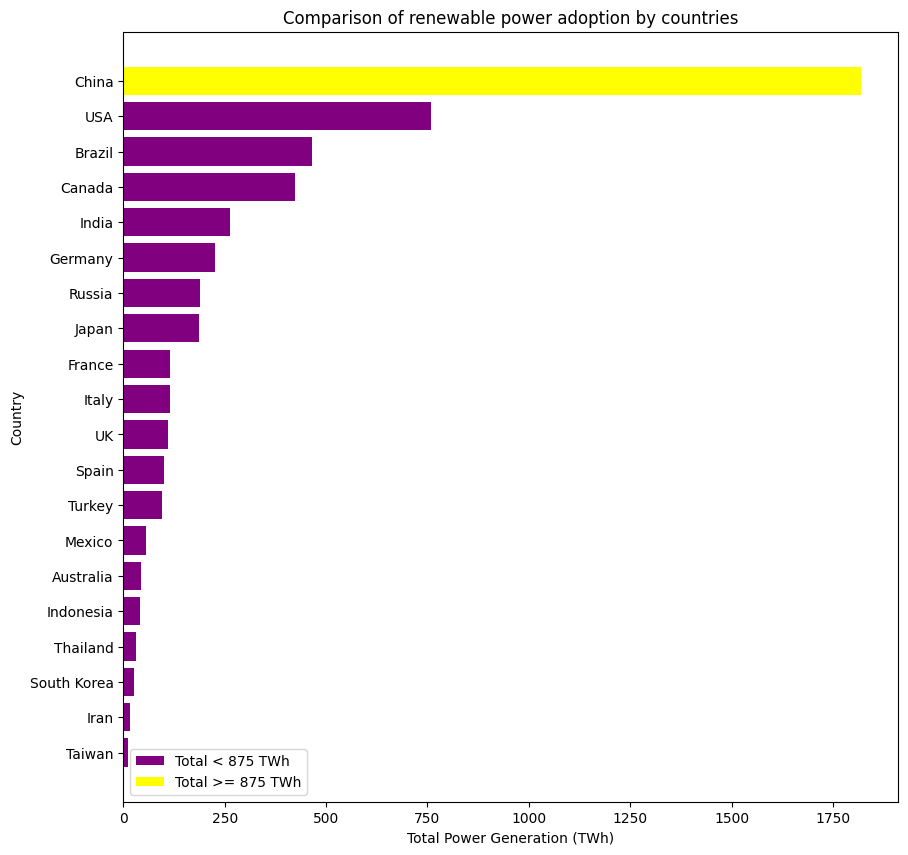

In [46]:
#comparing countries with low adoption of renewable resources and those with high adoption
# Filter the data for countries with less than 875 (TWh) and more than 875 (TWh)
below_half = df6[df6.Summary < 875]
above_half = df6[df6.Summary >= 875]

# Sort the data by total power generation in ascending order
below_half = below_half.sort_values(by='Summary')
above_half = above_half.sort_values(by='Summary')

# Plot countries with less than half (TWh) and more than or equal to 875 (TWh).
plt.figure(figsize=(10, 10))
colors = ['purple', 'yellow']
plt.barh(below_half['countries'], below_half['Summary'], label='Total < 875 TWh', color=colors[0])
plt.barh(above_half['countries'], above_half['Summary'], label='Total >= 875 TWh', color=colors[1])
plt.xlabel('Total Power Generation (TWh)')
plt.ylabel('Country')
plt.title('Comparison of renewable power adoption by countries')
plt.legend()
plt.show()

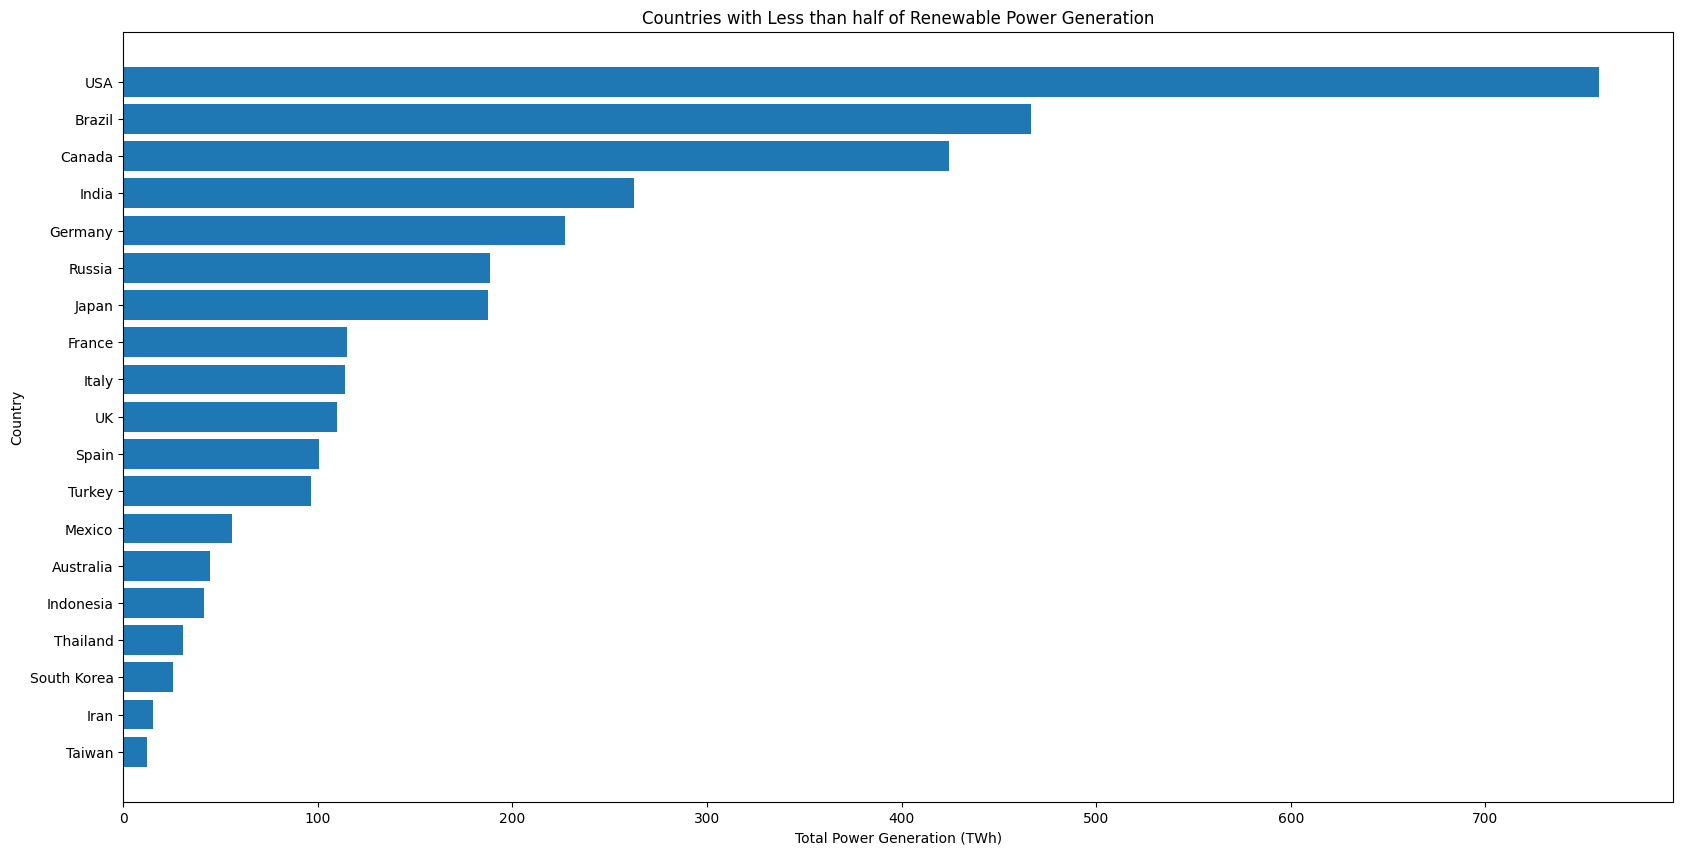

In [35]:
#discovering countries that have a low adoption of renewable resources
# Filter the data for countries with less than 875 Twh of total power generation from renewable sources
filtered_data = df6[df6.Summary < 875]
filtered_data = filtered_data.sort_values(by='Summary')

plt.figure(figsize=(20, 10))
plt.barh(filtered_data['countries'], filtered_data['Summary'])
plt.xlabel('Total Power Generation (TWh)')
plt.ylabel('Country')
plt.title('Countries with Less than half of Renewable Power Generation')
plt.show()